In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp

# Central Limit Theorem

In statistics, capital letters represent random variables.  So $X$ is a variable whose value is not yet known.  One can have multiple random variables from a single distribution, say $X_1, X_2, \ldots, X_N \sim \text{Poisson}(\lambda = 5)$.

**statistic**. A statistic is any function of (possibly many) random variables, $T(\mathbf{X})$, where $\mathbf{X}$ is used to represent a vector of random variables.

Because statistics are built from random variables, they too are random variables.  Just as we describe random variables with distributions, we also describe statistics with distributions, since statistics are just random variables.  In general, we don't know the distribution of a statistic.

However, for the mean, $T(\mathbf{X}) = \frac{1}{N} \sum_{n=1}^N X_n$ we have a sometimes good approximation based on the Central Limit Theorem.

The **Central Limit Theorem** (of the mean) dictates that the distribution of the sample mean is approximately normal for random variables $X_1, \ldots X_N \sim_{iid} F$

$$\frac{1}{N} \sum_{n=1}^N X_n \overset{\cdot}{\sim} \text{Normal}\left(\mathbb{E}[X], \sqrt{\frac{\mathbb{V}[X]}{N}} \right)$$

where $\text{Normal}(m, s)$ represents a normal distribution with mean $m$ and standard deviation $s$.

There's some key points about this theorem:

* $\overset{\cdot}{\sim}$ reads as is approximately distributed as, but really means converges in distribution.  The mean (as a statistic) has a distribution and thus a cumulative distribution function.  The cumulative distribution function of the mean converges to the normal distribution as specified in the theorem
* the approximating normal distributon is centered at exactly the point the mean (as an estimator) is estimating
* the width of the approximating normal distribution depends on both
    * the variance of the underlying random variables, e.g. $\mathbb{V}[X]$ of $X \sim \text{Poisson}(\lambda)$
    * the number of random variables, $N$

## Poisson Example

In [2]:
rng = np.random.default_rng()
l = 5
N = 1000 # number of random variables
R = 500  # number of convergence paths
x = rng.poisson(l, size = (R, N))
idx = np.arange(N) + 1

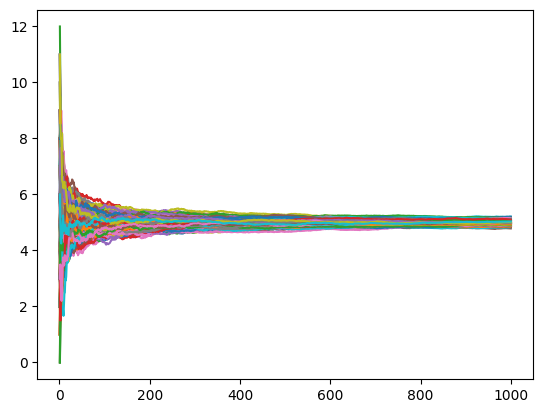

In [3]:
cm = np.cumsum(x, axis = 1) / idx
plt.plot(idx, cm.T);

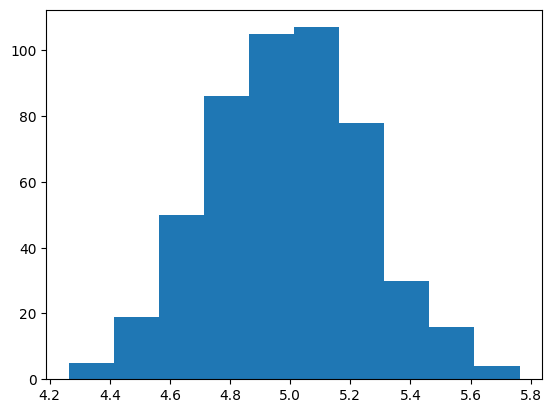

In [4]:
plt.hist(cm[:, 75]);

In [5]:
M = 75
np.std(cm[:, M]) # empirical estimate of ...

0.25825230850400044

In [6]:
np.sqrt(l / M) # ... the theoretical value

0.2581988897471611

## Uniform Example

In [7]:
a = 5
b = 2000
x = rng.uniform(a, b, size = (R, N))

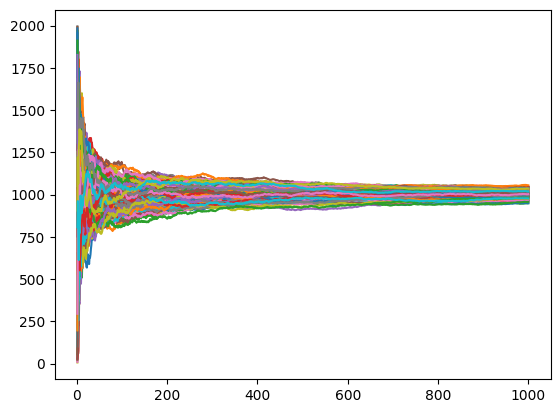

In [8]:
cm = np.cumsum(x, axis = 1) / idx
plt.plot(idx, cm.T);

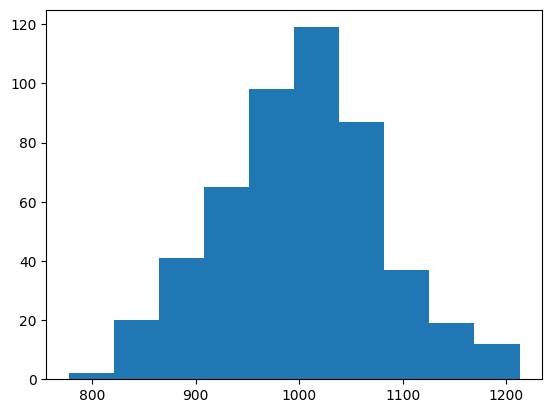

In [9]:
M = 50
plt.hist(cm[:, M]);

In [11]:
np.std(cm[:, M]) # empirical estimate ...

78.14028838392186

In [10]:
np.sqrt((b - a) ** 2 / 12 / M) # theoretical value

81.44553394754067

There's some more key points about this theorem:

* the distribution of the underlying random variables is (somewhat) arbitrary. Technically,
    * the approximating normal distribution depends on $\mathbb{E}[X]$ and $\mathbb{V}[X]$, but does not depend on the family of the distribution
    * since the approximating normal distribution depends on the variance, the variance must exist (be finite)
* the underlying random variables must be $iid$: *i*ndependent and *i*dentically *d*istributed, e.g.
    * idependent: data are not related
    * identically distributed: all random variables are from same family and have same parameters
    * not identically distributed: $X_n \sim \text{Bernoulli}(p_n)$
    * not independent: $X_1 = X_2 = \ldots = X_N$
    * want different values $X_n$ and $X_n \sim F(\theta)$
* the $\sqrt{N}$ in the denominator literally quantifies how fast the mean learns
* the approximating normal distribution degenerates as $N \to \infty$ upon the value $\mathbb{E}[X]$
* this is generally how (Frequentist) statisticians quantify uncertainty
* there are many Central Limit Theorems: standard deviation, median (for continuous distributions), $\ldots$
* there are not general Central Limit Theorems for all quantiles, especially extreme quantiles

## CLT for Std

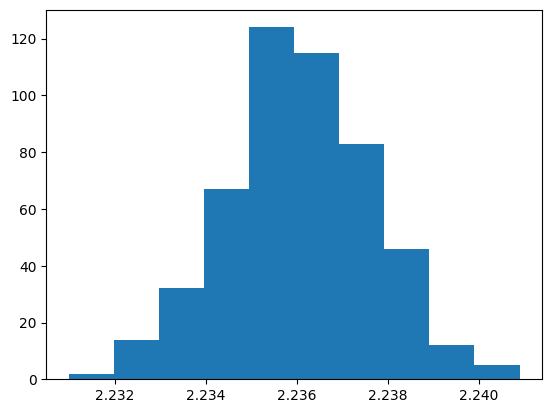

In [16]:
stds = np.zeros(R)
for r in range(R):
    x = rng.poisson(l, size= N ** 2)
    stds[r] = np.std(x)
plt.hist(stds);

In [17]:
np.std(stds)

0.001605356980612048